In [2]:
### Common imports
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math

### Custom functions
from src.rbm import RBM
from src.dbn import DBN
from src.dnn import DNN
from src.main import *

### RBM, Generate 0

In [3]:
X = lire_alpha_digit("0")
raw_shape = (20, 16)

cfg_dnn = {
    "channels":[320, 64],
    "n_classes":36
}

cfg_rbm = {
    "in_channels":320, 
    "out_channels":64,
}

cfg_train = {
    "n_epoches":1000,
    "lr":0.1,
    "batch_size":64
}

In [4]:
rbm = init_RBM(**cfg_rbm)

  0%|          | 0/1000 [00:00<?, ?it/s]

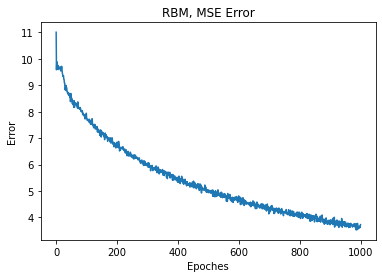

In [5]:
rbm, losses = train_RBM(rbm, X, **cfg_train)
plt.plot(losses)
plt.title("RBM, MSE Error")
plt.xlabel("Epoches")
plt.ylabel("Error")
plt.show()

In [6]:
output = generer_image_RBM(rbm, 100, 9).reshape(-1, *raw_shape)

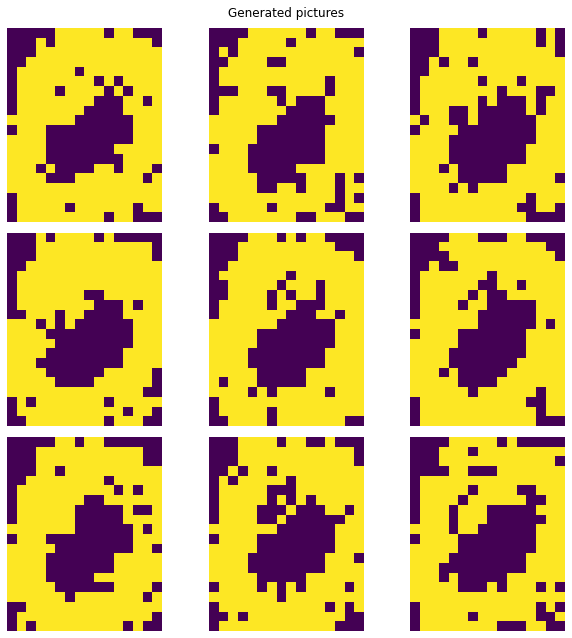

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(9, 9))
plt.suptitle("Generated pictures")
for i in range(3):
    axs[i, 0].imshow(output[i*3+0])
    axs[i, 0].axis("off")
    
    axs[i, 1].imshow(output[i*3+1])
    axs[i, 1].axis("off")
    
    axs[i, 2].imshow(output[i*3+2])
    axs[i, 2].axis("off")
    
plt.tight_layout()
plt.show()

### DNN, Generate 0

In [8]:
dnn = init_DNN(**cfg_dnn)

  0%|          | 0/1000 [00:00<?, ?it/s]

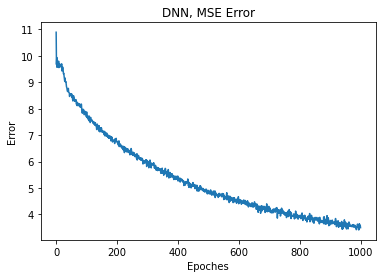

In [9]:
dnn, losses = pretrain_DNN(dnn, X, **cfg_train)
plt.plot(losses)
plt.title("DNN, MSE Error")
plt.xlabel("Epoches")
plt.ylabel("Error")
plt.show()

In [10]:
output = generer_image_DBN(dnn, 100, 9).reshape(-1, *raw_shape)

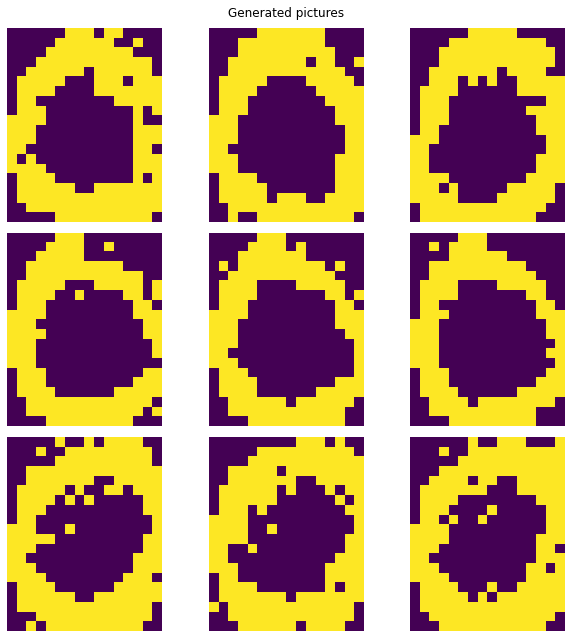

In [11]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(9, 9))
plt.suptitle("Generated pictures")
for i in range(3):
    axs[i, 0].imshow(output[i*3+0])
    axs[i, 0].axis("off")
    
    axs[i, 1].imshow(output[i*3+1])
    axs[i, 1].axis("off")
    
    axs[i, 2].imshow(output[i*3+2])
    axs[i, 2].axis("off")
    
plt.tight_layout()
plt.show()